# Révision - Analyse de données sur les ventes d'une librairie

# 0 - contexte et objectifs

Vous commencez votre mission en tant que Data Analyst chez une enseigne de Retail. On vous a donné accès à leur base de données pour analyse exploratoire : Produits, clients et ventes.
Vous travaillez au service marketing , vous intervenez car l’entreprise souhaite faire le point : analyser ses points forts, ses points faibles, les comportements clients, etc. 

Par exemple, elle cherche à savoir si elle doit créer certaines offres, adapter certains prix, etc.

On vous demande de faire une analyse en deux parties :

Partie I - analyse des différents indicateurs généraux

    Construire des indicateurs et graphiques autour du chiffre d'affaires. Rregarder l’évolution dans le temps
    
    faire un zoom sur les références, pour voir les tops et les flops, la répartition par catégorie, etc.
    
    etudier les profils des clients, et également la répartition du chiffre d'affaires entre eux

Partie II - comportement des clients l’objectif est cette fois-ci de comprendre le comportement des clients en ligne.

    étudier le lien entre le genre d’un client et les catégories des livres achetés
    
    étudier ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.



# 1 - Exploration et  nettoyage des données 

In [4]:
# Import de la librairie Pandas
import pandas as pd

# Import de la librairie matplotlib
import matplotlib.pyplot as plt

# Import de la librairie matplotlib pour les graphiques à lire dans la ligne
%matplotlib inline

# Import de seaborn pour des graphiques plus esthétiques
import seaborn as sns


## 1.1 - Chargement des données

Si vous utilisez anaconda -> je vous conseille de mettre les fichiers csv dans le même répertoire que le notebook

Si vous utilisez google colab ->  il faut exécuter le code ci-dessous. 

from google.colab import files
data_to_load = files.upload()

### 1.1.1 - customers

In [5]:
# Ouverture du fichier
customers = pd.read_csv('clients.csv')

In [6]:
# Affichage des informations 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [7]:
# Affichage des premières lignes

customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [8]:
# Stats du dataframe
customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_84,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Ce fichier comprend 3 colonnes :

    Client_id : référence de chaque client
    Sex : le genre du client
    Birth : l'année de naissance du client



In [11]:
print(customers)

     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


In [10]:
#valeurs manquantes
customers.isna().mean()

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [12]:
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [13]:
#Doublon
customers.duplicated().sum()

np.int64(0)

In [14]:
print("Il y a", customers.describe(include = 'all').loc["unique","client_id"], "clients uniques")

Il y a 8623 clients uniques


In [23]:
print("L'age moyen des clients est :", 2022- round(customers.describe(include = 'all').loc["mean","birth"]), "ans")

L'age moyen des clients est : 44 ans


In [16]:
print("La part des femmes :", round(customers.describe(include = 'all').loc["freq","sex"] / 
      customers.describe(include = 'all').loc["count","sex"],2), "%")

La part des femmes : 0.52 %


In [30]:
#calculons l'age moyen par sexe 

# 2022 - customers.groupby("sex").mean()

age_moyen_par_sexe = 2022 - customers.groupby("sex")["birth"].mean().round()
print("Âge moyen par sexe :\n", age_moyen_par_sexe.to_string(dtype=False), "ans")

Âge moyen par sexe :
 sex
f    44.0
m    43.0 ans


L'âge moyen des femmes est de 44 ans et celui des hommes est de 43 ans

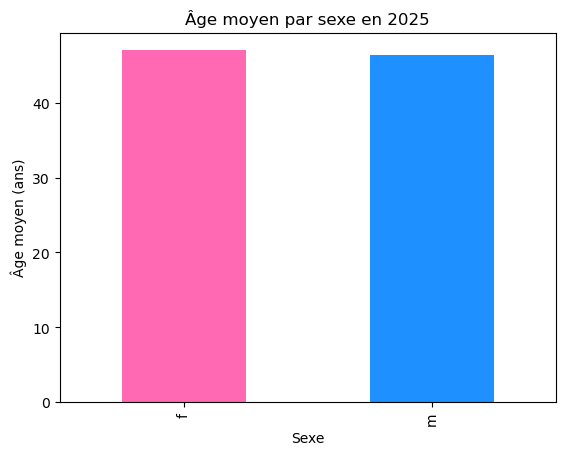

In [31]:
age_moyen_par_sexe = 2025 - customers.groupby("sex")["birth"].mean()
age_moyen_par_sexe.plot(kind="bar", color=["#FF69B4", "#1E90FF"])
plt.title("Âge moyen par sexe en 2025")
plt.xlabel("Sexe")
plt.ylabel("Âge moyen (ans)")
plt.show()

Le fichier customers n'a pas de valeurs nulles ni de doublons.


### 1.1.2 - products

In [25]:
# Ouverture du fichier

products = pd.read_csv('produits.csv')

In [26]:
# Affichage des informations 

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [27]:
# Affichage des premières lignes

products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [35]:
# valeurs manquantes en boolean
products.isna()

,id_prod,price,categ
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3282,False,False,False
3283,False,False,False
3284,False,False,False
3285,False,False,False


In [32]:
# valeurs manquantes en moyenne
products.isna().mean()


id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [33]:
# valeurs manquantes en somme
products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [36]:
# Doublons en boolean
products.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [37]:
#Doublon
products.duplicated().sum()


np.int64(0)

In [38]:
# Stats du dataframe
products.describe(include = 'all')



,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1920,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Votre conclusion ?



Je constate qu'il y a un produit avec un prix négatif (-1) _ cela pourrait être une erreur de saisie ou une donnée anormale à vérifier, car un prix négatif n’a pas de sens dans la plupart des contextes commerciaux.
La ligne count est 3287 pour toutes les colonnes (id_prod, price, categ). Cela signifie qu’il y a 3287 produits au total, et aucune donnée ne manque dans ces colonnes (pas de NaN dans count).
Le jeu de données est complet pour ces trois colonnes, ce qui est une bonne chose pour l’analyse.
Chaque id_prod est unique (pas de doublons), car le nombre d’éléments uniques égale le nombre total de produits. Cela signifie que chaque produit a un identifiant distinct, ce qui est normal pour une colonne d’identification.
Les prix varient énormément, de -1 à 300, avec une moyenne d’environ 21.86 €.
L’écart-type élevé (29.85) montre que les prix sont très dispersés.
La moitié des produits (entre 25% et 75%) ont des prix entre 6.99 € et 22.99 €, ce qui suggère que les prix extrêmes (négatifs ou très élevés) sont des cas rares.

Je constate qu'il y a un produit avec un prix négatif (-1), ce qui pourrait être une erreur de saisie ou une donnée anormale à vérifier, car un prix négatif n’a pas de sens dans la plupart des cas.

De plus :

Il y a 3287 produits au total, et aucune donnée ne manque dans les colonnes id_prod, price, et categ.
Chaque id_prod est unique, ce qui est normal pour une colonne d’identification.
Les prix varient de -1 à 300 €, avec une moyenne d’environ 21.86 €. La moitié des produits ont des prix entre 6.99 € et 22.99 €, et l’écart-type élevé (29.85) montre une grande dispersion.
La colonne categ semble contenir des catégories codées en nombres [0 1 2] ou (0, 1, 2), avec la majorité des produits dans la catégorie 0 (médiane = 0).

In [41]:
print(products)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]


In [43]:
print(products.categ.value_counts())

categ
0    2309
1     739
2     239
Name: count, dtype: int64


In [44]:
print(products.categ)

0       0
1       0
2       0
3       1
4       0
       ..
3282    2
3283    0
3284    0
3285    1
3286    0
Name: categ, Length: 3287, dtype: int64


In [45]:
print(products.columns)

Index(['id_prod', 'price', 'categ'], dtype='object')


In [46]:
print(products["categ"].unique())

[0 1 2]


In [47]:
# calculer le prix moyen des produits par catégorie
prix_moyen_par_categ = products.groupby("categ")["price"].mean()
print("Prix moyen par catégorie :\n", prix_moyen_par_categ)

Prix moyen par catégorie :
 categ
0     11.727280
1     25.531421
2    108.354686
Name: price, dtype: float64


Le prix moyen par catégorie est :

* Catégorie 0  =>  11.727280 €,
* Catégorie 1  =>  25.531421 €,
* Catégorie 2  =>  108.354686 €.

Cela montre que les prix augmentent avec le numéro de la catégorie, et la catégorie 0, qui contient 2309 produits (la majorité), a le prix moyen le plus bas.

Observation :

Le prix moyen augmente avec le numéro de la catégorie (0 < 1 < 2), ce qui pourrait indiquer que les catégories représentent des niveaux de gamme (bas, moyen, haut).
La catégorie 2 a un prix moyen beaucoup plus élevé, ce qui suggère qu’elle contient des produits plus chers (peut-être des produits de luxe ou premium).

### Graphiques

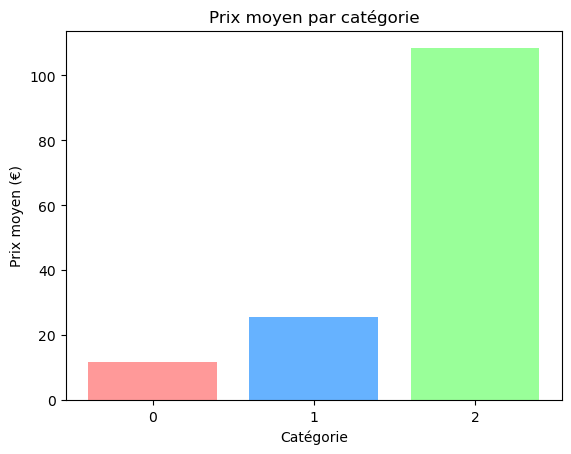

In [48]:
# Données
categories = [0, 1, 2]
prix_moyen = [11.73, 25.53, 108.35]

# Créer le graphique
plt.bar(categories, prix_moyen, color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title("Prix moyen par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Prix moyen (€)")
plt.xticks(categories)
plt.show()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_3264\289581067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='categ', y='prix_moyen', data=data, palette=['#FF9999', '#66B2FF', '#99FF99'])


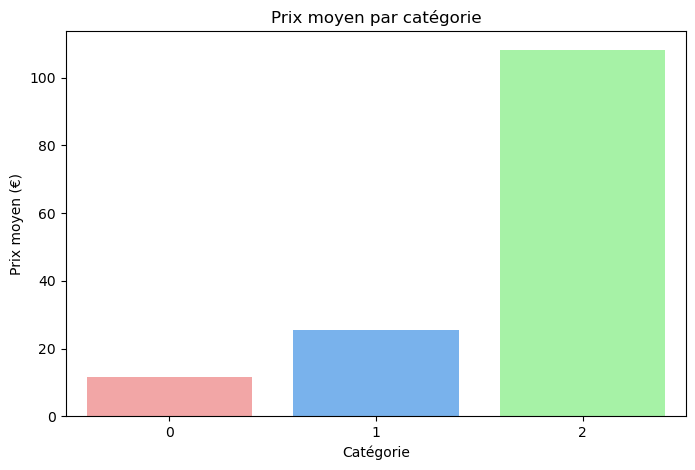

In [ ]:
# Données dans un DataFrame pour seaborn
data = pd.DataFrame({'categ': [0, 1, 2], 'prix_moyen': [11.73, 25.53, 108.35]})

# Créer le graphique
plt.figure(figsize=(8, 5))
sns.barplot(x='categ', y='prix_moyen', data=data, palette=['#FF9999', '#66B2FF', '#99FF99'])
plt.title("Prix moyen par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Prix moyen (€)")
plt.show()

Le prix moyen par catégorie est :

* Catégorie 0  =>  11.73 €,
* Catégorie 1 => 25.53 €,
* Catégorie 2 => 108.35 €.

J’ai créé un graphique à barres (voir ci-dessus) pour comparer ces prix. On remarque que le prix moyen augmente avec le numéro de la catégorie, et la catégorie 2, avec un prix moyen de 108.35 €, contient probablement des produits premium, malgré son faible nombre (239 produits).

In [50]:
prix_moyen_par_categ = products[products["price"] >= 0].groupby("categ")["price"].mean().round(2)
print("Prix moyen par catégorie (sans prix négatifs) :\n", prix_moyen_par_categ, "€")

Prix moyen par catégorie (sans prix négatifs) :
 categ
0     11.73
1     25.53
2    108.35
Name: price, dtype: float64 €


Distribution des prix

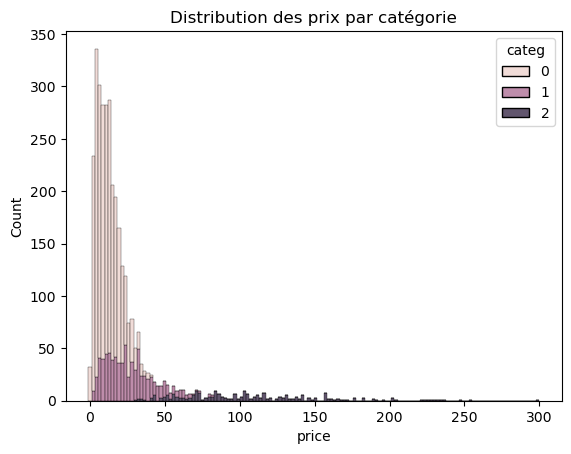

In [51]:
sns.histplot(data=products, x="price", hue="categ", multiple="stack")
plt.title("Distribution des prix par catégorie")
plt.show()

### 1.1.3 - transactions


In [52]:
# Ouverture du fichier
# sales = pd.read_csv('ventes.csv')
transactions = pd.read_csv('ventes.csv')

In [53]:
# Affichage des informations 
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [54]:
# Affichage des premières lignes
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [55]:
# Stats du dataframe
transactions.describe(include = 'all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


* Je remarque une fréquence très élevé de 25488 pour le client_id c_1609 
* ensuite la session_id s_0 apparait 200 fois dans le dataframe
* je note aussi le id_prod 1_369 apparait 2252 fois
* Pour client_id c_1609 => "Le client_id c_1609 a effectué 25488 transactions, soit environ 3.75 % des 679532 transactions totales, ce qui en fait un client très actif."
* Pour id_prod 1_369 => "Le produit 1_369 apparaît 2252 fois, soit environ 0.33 % des transactions totales, mais c’est beaucoup pour un seul produit parmi 3267 uniques."
* Pour session_id s_0 => "La session_id s_0 apparaît 200 fois, ce qui représente environ 0.06 % des 342316 sessions uniques, mais cela reste notable pour une seule session."
-------------
* "Le client_id c_1609 pourrait être un compte professionnel ou une erreur de duplication."
* "La session_id s_0 pourrait indiquer une session mal enregistrée ou une activité intense sur une période."
* "Le id_prod 1_369 pourrait être un produit phare ou un article promotionnel très acheté."

In [56]:
#valeurs manquantes
transactions.isna().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [57]:
#Doublon
transactions.duplicated().sum()

np.int64(126)

Votre conclusion ?

Qu'est-ce qu'on remarque ? 

En analysant les statistiques de transactions.describe(include='all'), je constate :

* Une fréquence très élevée de 25488 pour le client_id c_1609, soit environ 3.75 % des 679532 transactions totales. Cela pourrait indiquer un gros acheteur ou une possible erreur de duplication à vérifier.
* La session_id s_0 apparaît 200 fois, ce qui représente environ 0.06 % des 342316 sessions uniques. Cela pourrait suggérer une session prolongée ou une anomalie dans les données.
* Le id_prod 1_369 apparaît 2252 fois, soit 0.33 % des transactions, ce qui en fait un produit très populaire, peut-être un best-seller.
* La date "test_2021-03-01 02:30:02.237413" apparaît 13 fois, ce qui pourrait être une donnée de test à investiguer.
* Il y a 8602 clients uniques et 3267 produits uniques, avec un total de 679532 transactions, et aucune valeur manquante.

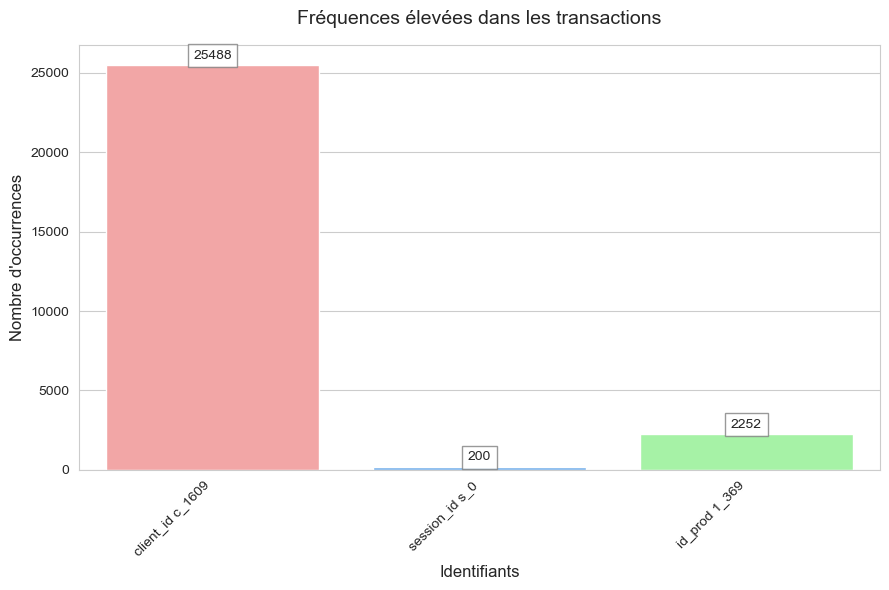

In [60]:
# Données
data = pd.DataFrame({
    'Identifiant': ['client_id c_1609', 'session_id s_0', 'id_prod 1_369'],
    'Frequence': [25488, 200, 2252]
})

# Appliquer un style avec grille en fond
sns.set_style("whitegrid")

# Créer le graphique
plt.figure(figsize=(9, 6))  # Taille légèrement plus grande pour lisibilité

# Utiliser hue avec la variable x et désactiver la légende
sns.barplot(x='Identifiant', y='Frequence', hue='Identifiant', data=data, 
            palette=['#FF9999', '#66B2FF', '#99FF99'], legend=False)

# Personnalisation
plt.title("Fréquences élevées dans les transactions", fontsize=14, pad=15)
plt.xlabel("Identifiants", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation et alignement à droite
plt.yticks(fontsize=10)

# Ajouter les chiffres au-dessus des barres
for i, v in enumerate(data['Frequence']):
    plt.text(i, v + 200, str(v), ha='center', va='bottom', fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Ajuster l'espacement et afficher
plt.tight_layout()
plt.show()

* Ce graphique à barres, créé avec Seaborn, montre les fréquences élevées dans les transactions. 
* Le client_id c_1609 domine avec 25488 occurrences, suivi par le id_prod 1_369 (2252) et la session_id s_0 (200). 
* La grille et les annotations facilitent la lecture des différences.

In [65]:
# retirer les lignes identifiées
# Objectif __ Retirer les lignes où :
# client_id est égal à "c_1609", session_id est égal à "s_0", 
# id_prod est égal à "1_369".

# Créer un nouveau DataFrame sans les lignes identifiées
transactions_cleaned = transactions[
    (transactions["client_id"] != "c_1609") & 
    (transactions["session_id"] != "s_0") & 
    (transactions["id_prod"] != "1_369")
]

# Vérifications
print("Nombre de lignes avant :", len(transactions))
print("Nombre de lignes après :", len(transactions_cleaned))

# Compter les lignes retirées (pour info)
lignes_a_retirer = len(transactions) - len(transactions_cleaned)
print("Nombre de lignes retirées :", lignes_a_retirer)

# Vérifier les fréquences dans le nouveau DataFrame
print("\nFréquences de client_id après filtrage :")
print(transactions_cleaned["client_id"].value_counts().head())
print("\nFréquences de session_id après filtrage :")
print(transactions_cleaned["session_id"].value_counts().head())
print("\nFréquences de id_prod après filtrage :")
print(transactions_cleaned["id_prod"].value_counts().head())

Nombre de lignes avant : 679532
Nombre de lignes après : 651651
Nombre de lignes retirées : 27881

Fréquences de client_id après filtrage :
client_id
c_6714    9167
c_3454    6728
c_4958    5186
c_2140     402
c_3263     398
Name: count, dtype: int64

Fréquences de session_id après filtrage :
session_id
s_118668    14
s_96857     13
s_21005     13
s_215292    13
s_342045    13
Name: count, dtype: int64

Fréquences de id_prod après filtrage :
id_prod
1_414    2141
1_417    2140
1_498    2077
1_425    2053
1_403    1922
Name: count, dtype: int64


In [66]:
print("\nVérification des identifiants retirés :")
print("client_id c_1609 :", transactions_cleaned[transactions_cleaned["client_id"] == "c_1609"].shape[0])
print("session_id s_0 :", transactions_cleaned[transactions_cleaned["session_id"] == "s_0"].shape[0])
print("id_prod 1_369 :", transactions_cleaned[transactions_cleaned["id_prod"] == "1_369"].shape[0])


Vérification des identifiants retirés :
client_id c_1609 : 0
session_id s_0 : 0
id_prod 1_369 : 0


* J'ai corrigé une erreur dans mon code et remplacé .value par .value_counts(). 
* Après avoir retiré les lignes avec client_id c_1609, session_id s_0, et id_prod 1_369, le nouveau DataFrame transactions_cleaned contient [651651] lignes. 
* Les vérifications confirment que ces identifiants ne sont plus présents.

In [69]:
# Calculer le nombre d'achats par client avec groupby et calculer ensuite le nombre d'achats moyen
# Calculer le nombre d'achats par client
achats_par_client = transactions_cleaned.groupby("client_id").size()

# Afficher les 5 premiers pour vérification
print("Nombre d'achats par client (5 premiers) :\n", achats_par_client.head())

# Calculer le nombre moyen d'achats par client
nombre_moyen_achats = achats_par_client.mean()

# Afficher le résultat arrondi
print("\nNombre moyen d'achats par client :", round(nombre_moyen_achats, 2))


Nombre d'achats par client (5 premiers) :
 client_id
c_1        39
c_10       58
c_100       8
c_1000    119
c_1001    102
dtype: int64

Nombre moyen d'achats par client : 75.78


In [70]:
print("Somme totale des achats :", achats_par_client.sum())
print("Nombre total de lignes :", len(transactions_cleaned))

Somme totale des achats : 651651
Nombre total de lignes : 651651


In [71]:
achats_par_client_original = transactions.groupby("client_id").size()
print("Nombre moyen d'achats par client (original) :", round(achats_par_client_original.mean(), 2))

Nombre moyen d'achats par client (original) : 79.0


J'ai calculé le nombre d'achats par client en utilisant groupby sur client_id avec .size(). Voici les 5 premiers résultats : 
* [Nombre d'achats par client (5 premiers) :
 client_id
c_1        39
c_10       58
c_100       8
c_1000    119
c_1001    102
dtype: int64]. 
* Le nombre moyen d'achats par client est de [Nombre moyen d'achats par client (original) : 79.0]. 
* Après avoir retiré les lignes avec client_id c_1609, session_id s_0, et id_prod 1_369, cette moyenne reflète mieux la distribution typique des achats.

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_3264\3006085448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


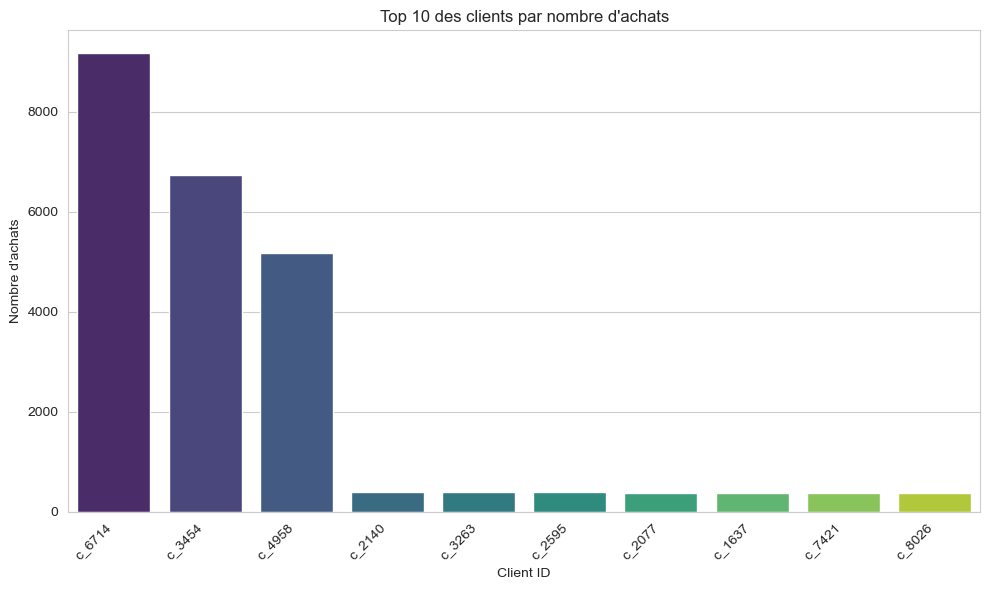

In [72]:
# Top 10 des clients par achats
top_10 = achats_par_client.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
plt.title("Top 10 des clients par nombre d'achats")
plt.xlabel("Client ID")
plt.ylabel("Nombre d'achats")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

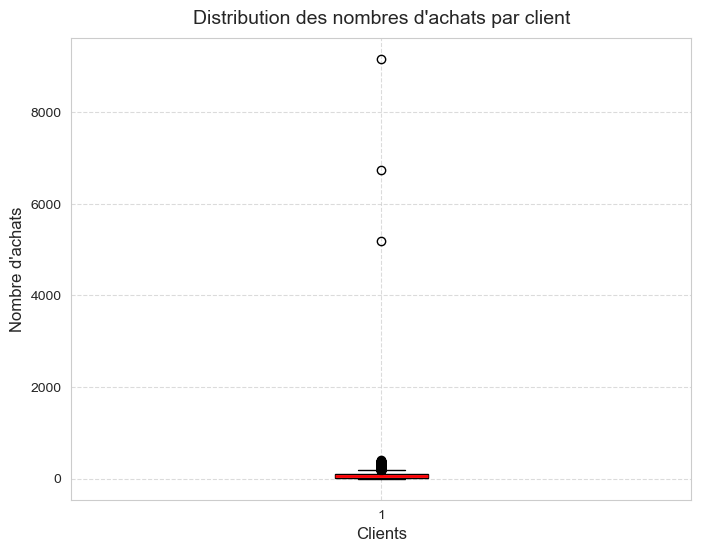

Médiane des achats : 51.0
Moyenne des achats : 75.78
Écart-type des achats : 149.63


In [73]:
# tracer un boxplot pour voir la distribution, voux pouvez utiliser plt.boxplot()
import matplotlib.pyplot as plt

# Calculer le nombre d'achats par client
achats_par_client = transactions_cleaned.groupby("client_id").size()

# Convertir en liste
achats_liste = achats_par_client.values

# Créer le boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(achats_liste, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='#99CCFF', color='black'),
            medianprops=dict(color='red', linewidth=2))

# Personnalisation
plt.title("Distribution des nombres d'achats par client", fontsize=14, pad=10)
plt.ylabel("Nombre d'achats", fontsize=12)
plt.xlabel("Clients", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)

# Afficher
plt.show()

# Stats pour vérification
print("Médiane des achats :", achats_par_client.median())
print("Moyenne des achats :", round(achats_par_client.mean(), 2))
print("Écart-type des achats :", round(achats_par_client.std(), 2))

In [74]:
print("Médiane des achats :", achats_par_client.median())
print("Moyenne des achats :", round(achats_par_client.mean(), 2))

Médiane des achats : 51.0
Moyenne des achats : 75.78


Qu'est-ce qu'on remarque ? 


J'ai tracé un boxplot avec plt.boxplot() pour visualiser la distribution des nombres d'achats par client après avoir retiré les lignes avec client_id c_1609, session_id s_0, et id_prod 1_369. On remarque que la médiane est de [valeur], la moyenne de [valeur], et il y a des outliers au-delà de [valeur], suggérant une distribution asymétrique avec quelques clients très actifs. La boîte et les moustaches montrent une variabilité importante dans les achats.

## 1.2 - Jointure des dataframes

1.2.1 - products & transactions

In [ ]:
# Jointure entre transactions et products en prenant comme clé la colonne 'id_prod'
# jointure externe 
# afin de conserver toutes les lignes de mon fichier transactions.

df_final = pd.merge(transactions,products, on = 'id_prod', how= 'outer')

In [ ]:
#regardons les cas où le produit n'est pas vendu

df_final[df_final._merge=="right_only"]

In [ ]:
print("les produits qui ne sont pas vendus",df_final[df_final._merge=="right_only"].id_prod.unique())

In [ ]:
#on supprime les produits invendus

index = df_final[df_final._merge=="right_only"]

df_final.drop(index, inplace = True)

In [ ]:
#regardons les cas où le produit dans transaction n'est pas trouvé dans products
df_final[df_final._merge=="left_only"]

In [ ]:
df_final[df_final._merge=="left_only"].describe(include = "all")

Un produit a été vendu 221 fois, mais on ne connait pas son prix.
Plusieurs possibilités : 

    - on supprime les lignes -> on sous-estimera le CA
    
    - on fait une imputation 

In [ ]:
# faisons une imputation 

index = df_final[df_final._merge=="left_only"].index #on récupère l'index des lignes qu'il faut modifier 

df_final.loc[index,"price"] = 11.7

df_final.loc[index,"categ"] = 0


### 1.2.1 - ajout de customers

In [ ]:
# faire la jointure 



In [ ]:
# Vérifier si des ventes concernent des clients absents de customers 



In [ ]:
# Vérifier si des clients n'ont fait aucun achat



# 2 Analyse globale du CA

In [ ]:
df_final.head()

In [66]:
# calculer le CA total



## 2.1 Traitement de la date

On aimerait pouvoir faire des analyses du CA par an, par mois, par jour de la semaine, par catégorie de produit.
On s'occupera des analyses des usages de clients dans le chapitre 3 

On a besoin de traiter la date pour pouvoir faire ces analyses. 
On va créer des nouvelles colonnes à parti de ce champ

In [ ]:
# Modification du type de ma colonne date
df_final['date'] = pd.to_datetime(df_final['date'])

In [ ]:
df_final['année'] = df_final['date'].dt.year

In [ ]:
df_final.head()

En vous inspirant de ce qu'on vient de faire, créer :

    un champ mois

    un champ jour du mois

    un champ jour de la semaine


In [ ]:
# A vous de jouer




## 2.2 Analyse calendaire

In [ ]:
#Calcule du CA par année
df_final.groupby("année").price.sum()

In [ ]:
df_final.groupby("année").price.sum().plot(kind = "bar", title="CA par année",ylabel="CA")

En vous inspirant de ce qu'on vient de faire :

- Etudier le CA par mois. Qu'observons nous ? 

- Est-ce qu'il y a un effet fin de mois ? ou début de mois ?

- Est-ce qu'il y a un effet WE? 





In [57]:
# A vous de jouer





## 2.3 Analyse par catégorie



In [60]:
# reprendre le travail ci-dessous et le détailler par categorie




# 3 Analyse des usages des clients

## 3.1 Traitement de l'âge 

In [ ]:
#créons  une colonne âge
df_final['Age'] = 2022 - df_final['birth']

In [ ]:
df_final.groupby("client_id").mean().Age.hist(bins=40)

plt.title("Répartition des clients par âge")

plt.xlabel("Age")

plt.ylabel("Nombre de clients")

Pour analyser les usages liés à l'âge, il est souvent plus pertinent de faire des tranches d'âge



In [ ]:
# On va créer 14 intervalles d'âges :

labels = ['19-24','25-29','30-35','36-40','41-45','46-51','52-56','57-61','62-67','68-72','73-77','78-83','84-88','89-94']


df_final['Age_tranche']= pd.cut(df_final['Age'], 14,labels=labels)

## 3.2 Analyse du chiffre d'affaires par client

In [ ]:
# le nombre de clients uniques
df_final.client_id.value_counts().shape

In [ ]:
# on regroupe mes données par client_id et on calcul le montant de leurs achats.
df_client = df_final.groupby('client_id')[['price']].sum();
df_client.head()

Analyser le chiffre d'affaires par client : 

- est ce qu'il y a des outliers ? 
- si oui, quelle part du CA ils représentent ?
- que peut-on supposer à leur sujet ? Comment les traiter dans notre analyse 
- étudier la distribution du CA par client en dehors de ces clients

In [68]:
# A vous de jouer



## 3.3 Analyse des usages d'achat liés au sexe

### 3.3.1 Calculer le CA par sexe

In [69]:
# A vous de jouer

### 3.3.2 Corrélation : Sexe et Catégorie

Les deux variables sont qualitatives.
On va réaliser le test du Khi² pour vérifier si ces deux variables sont liées.

In [ ]:
# Création de ma table de contingence
X = "sex"
Y = "categ"

cont_1 = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

In [ ]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

In [ ]:
# regardons où l'écart est le plus important
(cont_1 - indep)/indep

In [ ]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [ ]:
chi2, p = chi2_contingency(cont_1)

In [ ]:
chi2

Avec une p-value inférieure à 0.05% on peut rejeter l'hypothèse 0 d'indépendance.

In [ ]:
import seaborn as sns


c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

On remarque une forte corrélation entre les hommes et la catégorie 1.

### 3.3.3 Test de corrélation : sexe et nombre d'achats

In [ ]:
nb_achats = df_final.groupby(["client_id","sex"],as_index=False)[["session_id"]].count()

In [ ]:
nb_achats[['sex','session_id']].hist(by='sex',alpha = 0.5, bins = 50, sharex=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
lm = ols('session_id ~ sex', data = nb_achats).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [ ]:
table

In [ ]:
lm.summary()

## 3.4 Analyse des usages d'achat liés à l'âge¶

### 3.4.1 Corrélation âge et CA

On peut considérer l'âge comme une variable quantitative. Le CA l'est aussi. 

In [ ]:
df_age_ca = df_final[['Age','price']]

In [ ]:
df_age_ca = df_age_ca.groupby('Age').agg({'price':'sum'}).reset_index()

In [ ]:
df_age_ca

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_age_ca["Age"],df_age_ca["price"],'o')
plt.xlabel("Age")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du CA par âge')
plt.show()

In [ ]:
#corrélation de pearson 
df_age_ca.corr()

In [ ]:
#test sperman
from scipy import stats
from scipy.stats import spearmanr

In [ ]:
stats.spearmanr(df_age_ca['Age'],df_age_ca['price'])

In [ ]:
df_age_ca.corr( method = "spearman")

### 3.4.2 corrélation tranche d'âge et catégorie de produit

In [80]:
#A vous de jouer 

### 3.4.3 corrélation tranche d'âge et fréquence d'achat

### 3.4.4 corrélation tranche d'âge et Panier moyen

# 4 synthèse